In [4]:
#pip install opencv-python


   ---------------------------------------- 0.0/40.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/40.2 MB ? eta -:--:--
   - -------------------------------------- 1.0/40.2 MB 2.7 MB/s eta 0:00:15
   -- ------------------------------------- 2.1/40.2 MB 3.7 MB/s eta 0:00:11
   --- ------------------------------------ 3.1/40.2 MB 4.0 MB/s eta 0:00:10
   --- ------------------------------------ 3.9/40.2 MB 4.2 MB/s eta 0:00:09
   ---- ----------------------------------- 5.0/40.2 MB 4.2 MB/s eta 0:00:09
   ----- ---------------------------------- 5.8/40.2 MB 4.2 MB/s eta 0:00:09
   ------ --------------------------------- 6.8/40.2 MB 4.3 MB/s eta 0:00:08
   ------- -------------------------------- 7.9/40.2 MB 4.3 MB/s eta 0:00:08
   -------- ------------------------------- 8.9/40.2 MB 4.4 MB/s eta 0:00:08
   --------- ------------------------------ 10.0/40.2 MB 4.5 MB/s eta 0:00:07
   ---------- ----------------------------- 10.7/40.2 MB 4.4 MB/s eta 0:00:07
   -------

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import cv2
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [3]:
data=r"C:\Users\asus\Downloads\Deeplearningdataset\forest_fire\Testing"

In [4]:
x1,y1=[],[]
for i in os.listdir(data):
    new_dir=os.path.join(data,i)
    if os.path.isdir(new_dir):
        for j in os.listdir(new_dir):
            image_path=os.path.join(new_dir,j)
            if image_path.endswith((".png",".jpg",".jpeg")):
                image_data=cv2.imread(image_path)
                array_resize=cv2.resize(image_data,(100,100))
                array_reshape=array_resize.reshape(100,100,3)
                array_norm=array_reshape/255
                x1.append(array_norm)
                y1.append(i)
x1=np.array(x1)
y1=np.array(y1)
print(x1.shape)
print(y1.shape)

(68, 100, 100, 3)
(68,)


In [5]:
data1=r"C:\Users\asus\Downloads\Deeplearningdataset\forest_fire\Training and Validation"

In [7]:
x2,y2=[],[]
for i in os.listdir(data1):
    new_dir=os.path.join(data1,i)
    if os.path.isdir(new_dir):
        for j in os.listdir(new_dir):
            image_path=os.path.join(new_dir,j)
            if image_path.endswith((".png",".jpg",".jpeg")):
                image_data=cv2.imread(image_path)
                array_resize=cv2.resize(image_data,(100,100))
                array_reshape=array_resize.reshape(100,100,3)
                array_norm=array_reshape/255
                x2.append(array_norm)
                y2.append(i)
x2=np.array(x2)
y2=np.array(y2)
print(x2.shape)
print(y2.shape)

(1912, 100, 100, 3)
(1912,)


In [8]:
x=np.concatenate((x1,x2))
y=np.concatenate((y1,y2))
y

array(['fire', 'fire', 'fire', ..., 'nofire', 'nofire', 'nofire'],
      dtype='<U6')

In [9]:
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1])

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
print(len(xtrain),len(ytrain))
print(len(xtest),len(ytest))

1584 1584
396 396


In [23]:
#model=load_model("fire_video.h5")

In [24]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(100,100,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2,activation="softmax"))

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,732,034 (6.61 MB)

 Trainable params: 1,732,034 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [28]:
model.fit(xtrain,ytrain,batch_size=10,epochs=22,validation_data=(xtest,ytest))

Epoch 1/22
159/159 ━━━━━━━━━━━━━━━━━━━━ 31s 148ms/step - accuracy: 0.9135 - loss: 0.2481 - val_accuracy: 0.9268 - val_loss: 0.2055
Epoch 2/22
159/159 ━━━━━━━━━━━━━━━━━━━━ 25s 154ms/step - accuracy: 0.9451 - loss: 0.1848 - val_accuracy: 0.9545 - val_loss: 0.1684
Epoch 3/22
159/159 ━━━━━━━━━━━━━━━━━━━━ 31s 194ms/step - accuracy: 0.9476 - loss: 0.1443 - val_accuracy: 0.9470 - val_loss: 0.1482
Epoch 4/22
159/159 ━━━━━━━━━━━━━━━━━━━━ 32s 198ms/step - accuracy: 0.9621 - loss: 0.1219 - val_accuracy: 0.9545 - val_loss: 0.1346
Epoch 5/22
159/159 ━━━━━━━━━━━━━━━━━━━━ 27s 171ms/step - accuracy: 0.9571 - loss: 0.1234 - val_accuracy: 0.9596 - val_loss: 0.1084
Epoch 6/22
159/159 ━━━━━━━━━━━━━━━━━━━━ 29s 178ms/step - accuracy: 0.9640 - loss: 0.1015 - val_accuracy: 0.8889 - val_loss: 0.3095
Epoch 7/22
159/159 ━━━━━━━━━━━━━━━━━━━━ 40s 167ms/step - accuracy: 0.9634 - loss: 0.0952 - val_accuracy: 0.9596 - val_loss: 0.1457
Epoch 8/22
159/159 ━━━━━━━━━━━━━━━━━━━━ 29s 181ms/step - accuracy: 0.9710 - loss: 0

In [29]:
test_data1=r"C:\Users\asus\Downloads\Deeplearningdataset\forest_fire\Testing\fire\abc186.jpg"

In [34]:
image_data=cv2.imread(test_data1)
array_resize=cv2.resize(image_data,(100,100))
array_reshape=array_resize.reshape(1,100,100,3)
array_norm=array_reshape/255
print(array_norm.shape)

(1, 100, 100, 3)


In [35]:
a=model.predict(array_norm)
a

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


array([[1.000000e+00, 2.848066e-08]], dtype=float32)

In [36]:
label=["fire","nofire"]

In [38]:
b=np.argmax(a)
label[b]

'fire'

In [39]:
test_data2=r"C:\Users\asus\Downloads\Deeplearningdataset\forest_fire\Testing\nofire\abc339.jpg"

In [40]:
image_data=cv2.imread(test_data2)
array_resize=cv2.resize(image_data,(100,100))
array_reshape=array_resize.reshape(1,100,100,3)
array_norm=array_reshape/255
print(array_norm.shape)

(1, 100, 100, 3)


In [41]:
c=model.predict(array_norm)
c

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([[6.8721592e-06, 9.9999309e-01]], dtype=float32)

In [42]:
d=np.argmax(c)
label[d]

'nofire'

In [43]:
ypred=model.predict(xtest)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step 


In [44]:
ypredd=[]
for i in ypred:
    ypredd.append(np.argmax(i))
    

In [45]:
cm=confusion_matrix(ytest,ypredd)
cm

array([[190,   7],
       [  6, 193]])

<Axes: >

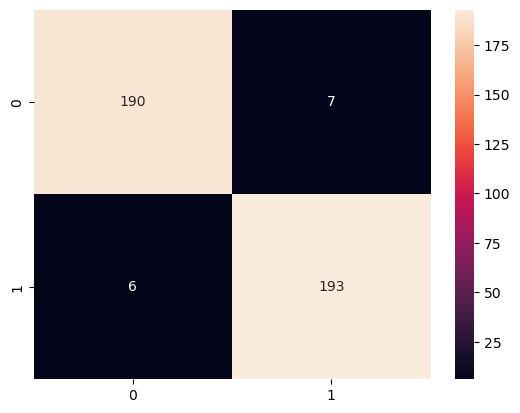

In [47]:
sns.heatmap(cm,fmt="d",annot=True)